In [14]:
#importing goodies
import functools
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl

#trying to make it the latex font stuff
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

#letting grader know what problem we're doing
print("problem 5.9")

from wolthuis_hw3_gaussxw import gaussxw

problem 5.9


In [48]:
def cv(T):
    
    #setting up constants
    kb = 1.38064852 * 10 ** (-23)
    rho = 6.022 * 10 ** (28)
    thd = 428
    V = 10 ** (-3)
    
    #defining the function to be integrated
    def f(x):
        val = ((x**4)*(np.exp(x))) / ((np.exp(x) - 1)**2)
        return val
    
    #deining parameters of integration
    N = 50
    a = 0.0
    b = thd / T
    
    #calculating sample points and weights then mapping them onto the domain
    x , w  = gaussxw(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    
    #performing gaussian integration
    s = 0.0
    for i in range(N):
        s += wp[i]*f(xp[i])
        
    
    #making the values
    val = 9 * V * rho * kb * (T/thd)**3 * (s)
    return val

In [50]:
print("the value of the integral from 5 to 500 K is:",cv(500) - cv(5))

the value of the integral from 5 to 500 K is: 2404.925728528575


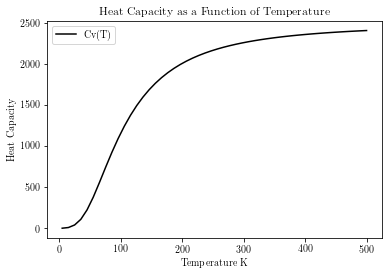

In [46]:
#making lists for graphs
y = []
x = []

#making for loops
for i in np.linspace(5,500):
    val = cv(i)
    y.append(val)
    x.append(i)

#plotting things please

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

#plotting the function
plt.plot(x,y , label = "Cv(T)", color = 'k')


#Formatting, Labels, & Legends
plt.xlabel('Temperature K')
plt.ylabel('Heat Capacity')
plt.title('Heat Capacity as a Function of Temperature')
plt.legend()

#Line of best fit
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.show()